<a href="https://colab.research.google.com/github/mabittar/FinancialData/blob/master/technical_analysis/Quandl_Stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to get financial data from internet?
### US: In this notebook it's show how to use Quandl to get stock data and how to use it. Can't find brazilian stock shares
### PT: Nesse notebook será mostrado como obter dados das ações usando Quantl e como tratar tais informações. Não consegui encontrar as cotações para ações do Brasil.

This example are part of my project, see all project in:

Esse exemplo é parte do meu projeto, veja o projeto completo em:

[Github](https://github.com/mabittar/FinancialData.git)


Part of this notebook was written followig an [Webinar](https://youtu.be/9e4owXIvK_8) from [TradingComDados](https://www.tradingcomdados.com/)

Install and importing data from [Quandl](https://www.quandl.com/)
First create a account on Qandl because it's need autentication to use the API


In [87]:
!pip install quandl
#import Quandl library
import quandl

In [0]:
#Import others libraries
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data
from functools import reduce

In [89]:
# To get your personal API key, sign up for a free Quandl account. Then, you can find your API key on Quandl account settings page.
#let's authenticate to use the library
from google.colab import files
uploaded = files.upload() #to upload an txt with API_Key
file = open('Quandl.txt', "r") #already uploaded to google colab
quandl_key = file.read()
quandl.ApiConfig.api_key = quandl_key

In [0]:
# Note that you need to know the "Quandl code" of each dataset you download. In the above example, it is 'EOD/AAPL'.
tickers = ["WIKI/F", "WIKI/MSFT", "WIKI/FB", "WIKI/NFLX", "WIKI/GOOG", "WIKI/TSLA", "BCB/7"]
# "PETR4.SA", "VALE3.SA", "UGPA3.SA", "ITSA3.SA", "EZTC3.SA" - Can't find brazilian shares information on free datasets

Tickers:

F = Ford

MSFT = Microsoft

FB = Facebook

NFLX = Netflix

GOOG = Alphabet (google)

TSLA = Tesla

^BVSP = Indice Bovespa

PETR4.SA = Petrobras

VALE3.SA = VALE

UGPA3.SA = Ultrapar

ITSA4.SA = Itausa

EZTC3.SA = EZTEC

In [92]:
quandl_manystocks = quandl.get(tickers, start_date="2016-01-01", index_col=0)
quandl_manystocks.head()

,WIKI/F - Open,WIKI/F - High,WIKI/F - Low,WIKI/F - Close,WIKI/F - Volume,WIKI/F - Ex-Dividend,WIKI/F - Split Ratio,WIKI/F - Adj. Open,WIKI/F - Adj. High,WIKI/F - Adj. Low,WIKI/F - Adj. Close,WIKI/F - Adj. Volume,WIKI/MSFT - Open,WIKI/MSFT - High,WIKI/MSFT - Low,WIKI/MSFT - Close,WIKI/MSFT - Volume,WIKI/MSFT - Ex-Dividend,WIKI/MSFT - Split Ratio,WIKI/MSFT - Adj. Open,WIKI/MSFT - Adj. High,WIKI/MSFT - Adj. Low,WIKI/MSFT - Adj. Close,WIKI/MSFT - Adj. Volume,WIKI/FB - Open,WIKI/FB - High,WIKI/FB - Low,WIKI/FB - Close,WIKI/FB - Volume,WIKI/FB - Ex-Dividend,WIKI/FB - Split Ratio,WIKI/FB - Adj. Open,WIKI/FB - Adj. High,WIKI/FB - Adj. Low,WIKI/FB - Adj. Close,WIKI/FB - Adj. Volume,WIKI/NFLX - Open,WIKI/NFLX - High,WIKI/NFLX - Low,WIKI/NFLX - Close,WIKI/NFLX - Volume,WIKI/NFLX - Ex-Dividend,WIKI/NFLX - Split Ratio,WIKI/NFLX - Adj. Open,WIKI/NFLX - Adj. High,WIKI/NFLX - Adj. Low,WIKI/NFLX - Adj. Close,WIKI/NFLX - Adj. Volume,WIKI/GOOG - Open,WIKI/GOOG - High,WIKI/GOOG - Low,WIKI/GOOG - Close,WIKI/GOOG - Volume,WIKI/GOOG - Ex-Dividend,WIKI/GOOG - Split Ratio,WIKI/GOOG - Adj. Open,WIKI/GOOG - Adj. High,WIKI/GOOG - Adj. Low,WIKI/GOOG - Adj. Close,WIKI/GOOG - Adj. Volume,WIKI/TSLA - Open,WIKI/TSLA - High,WIKI/TSLA - Low,WIKI/TSLA - Close,WIKI/TSLA - Volume,WIKI/TSLA - Ex-Dividend,WIKI/TSLA - Split Ratio,WIKI/TSLA - Adj. Open,WIKI/TSLA - Adj. High,WIKI/TSLA - Adj. Low,WIKI/TSLA - Adj. Close,WIKI/TSLA - Adj. Volume,BCB/7 - Value
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,13.87,14.00,13.75,13.97,38618524.0,0.0,1.0,12.278426,12.393508,12.172195,12.366951,38618524.0,54.32,54.8000,53.39,54.80,53777963.0,0.0,1.0,51.724533,52.181598,50.838969,52.181598,53777963.0,101.95,102.2400,99.7500,102.22,37912403.0,0.0,1.0,101.95,102.2400,99.7500,102.22,37912403.0,109.00,110.00,105.21,109.96,20794848.0,0.0,1.0,109.00,110.00,105.21,109.96,20794848.0,743.00,744.06,731.2577,741.84,3272776.0,0.0,1.0,743.00,744.06,731.2577,741.84,3272776.0,230.72,231.38,219.00,223.41,6827146.0,0.0,1.0,230.72,231.38,219.00,223.41,6827146.0,42141.0
2016-01-05,13.97,14.00,13.51,13.72,50237919.0,0.0,1.0,12.366951,12.393508,11.959735,12.145638,50237919.0,54.93,55.3900,54.54,55.05,34079674.0,0.0,1.0,52.305386,52.743407,51.934021,52.419653,34079674.0,102.89,103.7099,101.6650,102.73,23258238.0,0.0,1.0,102.89,103.7099,101.6650,102.73,23258238.0,110.45,110.58,105.85,107.66,17664562.0,0.0,1.0,110.45,110.58,105.85,107.66,17664562.0,746.45,752.00,738.6400,742.58,1950691.0,0.0,1.0,746.45,752.00,738.6400,742.58,1950691.0,226.36,226.89,220.00,223.43,3186752.0,0.0,1.0,226.36,226.89,220.00,223.43,3186752.0,42419.0
2016-01-06,13.56,13.56,13.05,13.11,61259369.0,0.0,1.0,12.003998,12.003998,11.552520,11.605635,61259369.0,54.32,54.4001,53.64,54.05,39518863.0,0.0,1.0,51.724533,51.800805,51.077024,51.467434,39518863.0,101.13,103.7700,100.9000,102.97,25096183.0,0.0,1.0,101.13,103.7700,100.9000,102.97,25096183.0,105.29,117.91,104.96,117.68,33045656.0,0.0,1.0,105.29,117.91,104.96,117.68,33045656.0,730.00,747.18,728.9200,743.62,1947034.0,0.0,1.0,730.00,747.18,728.9200,743.62,1947034.0,220.00,220.05,215.98,219.04,3779128.0,0.0,1.0,220.00,220.05,215.98,219.04,3779128.0,41773.0
2016-01-07,12.90,13.04,12.60,12.70,57836454.0,0.0,1.0,11.419732,11.543668,11.154157,11.242682,57836454.0,52.70,53.4850,52.07,52.17,56564852.0,0.0,1.0,50.181938,50.929430,49.582040,49.677262,56564852.0,100.50,101.4300,97.3000,97.92,45172906.0,0.0,1.0,100.50,101.4300,97.3000,97.92,45172906.0,116.36,122.18,112.29,114.56,33636661.0,0.0,1.0,116.36,122.18,112.29,114.56,33636661.0,730.31,738.50,719.0600,726.39,2963741.0,0.0,1.0,730.31,738.50,719.0600,726.39,2963741.0,214.19,218.44,213.67,215.65,3554251.0,0.0,1.0,214.19,218.44,213.67,215.65,3554251.0,40694.0
2016-01-08,13.05,13.10,12.50,12.54,46173309.0,0.0,1.0,11.552520,11.596783,11.065632,11.101042,46173309.0,52.37,53.2800,52.15,52.33,48753969.0,0.0,1.0,49.867706,50.734225,49.658218,49.829617,48753969.0,99.88,100.5000,97.0311,97.33,35402298.0,0.0,1.

In [93]:
# iterating the columns 
for col in quandl_manystocks.columns: 
    print(col) 

WIKI/F - Open
WIKI/F - High
WIKI/F - Low
WIKI/F - Close
WIKI/F - Volume
WIKI/F - Ex-Dividend
WIKI/F - Split Ratio
WIKI/F - Adj. Open
WIKI/F - Adj. High
WIKI/F - Adj. Low
WIKI/F - Adj. Close
WIKI/F - Adj. Volume
WIKI/MSFT - Open
WIKI/MSFT - High
WIKI/MSFT - Low
WIKI/MSFT - Close
WIKI/MSFT - Volume
WIKI/MSFT - Ex-Dividend
WIKI/MSFT - Split Ratio
WIKI/MSFT - Adj. Open
WIKI/MSFT - Adj. High
WIKI/MSFT - Adj. Low
WIKI/MSFT - Adj. Close
WIKI/MSFT - Adj. Volume
WIKI/FB - Open
WIKI/FB - High
WIKI/FB - Low
WIKI/FB - Close
WIKI/FB - Volume
WIKI/FB - Ex-Dividend
WIKI/FB - Split Ratio
WIKI/FB - Adj. Open
WIKI/FB - Adj. High
WIKI/FB - Adj. Low
WIKI/FB - Adj. Close
WIKI/FB - Adj. Volume
WIKI/NFLX - Open
WIKI/NFLX - High
WIKI/NFLX - Low
WIKI/NFLX - Close
WIKI/NFLX - Volume
WIKI/NFLX - Ex-Dividend
WIKI/NFLX - Split Ratio
WIKI/NFLX - Adj. Open
WIKI/NFLX - Adj. High
WIKI/NFLX - Adj. Low
WIKI/NFLX - Adj. Close
WIKI/NFLX - Adj. Volume
WIKI/GOOG - Open
WIKI/GOOG - High
WIKI/GOOG - Low
WIKI/GOOG - Close
WIKI

The data has o ticker with different collumn, lets drop it...

In [94]:
quandl_manystocks.drop(['BCB/7 - Value'], axis=1)
quandl_manystocks.head()

,WIKI/F - Open,WIKI/F - High,WIKI/F - Low,WIKI/F - Close,WIKI/F - Volume,WIKI/F - Ex-Dividend,WIKI/F - Split Ratio,WIKI/F - Adj. Open,WIKI/F - Adj. High,WIKI/F - Adj. Low,WIKI/F - Adj. Close,WIKI/F - Adj. Volume,WIKI/MSFT - Open,WIKI/MSFT - High,WIKI/MSFT - Low,WIKI/MSFT - Close,WIKI/MSFT - Volume,WIKI/MSFT - Ex-Dividend,WIKI/MSFT - Split Ratio,WIKI/MSFT - Adj. Open,WIKI/MSFT - Adj. High,WIKI/MSFT - Adj. Low,WIKI/MSFT - Adj. Close,WIKI/MSFT - Adj. Volume,WIKI/FB - Open,WIKI/FB - High,WIKI/FB - Low,WIKI/FB - Close,WIKI/FB - Volume,WIKI/FB - Ex-Dividend,WIKI/FB - Split Ratio,WIKI/FB - Adj. Open,WIKI/FB - Adj. High,WIKI/FB - Adj. Low,WIKI/FB - Adj. Close,WIKI/FB - Adj. Volume,WIKI/NFLX - Open,WIKI/NFLX - High,WIKI/NFLX - Low,WIKI/NFLX - Close,WIKI/NFLX - Volume,WIKI/NFLX - Ex-Dividend,WIKI/NFLX - Split Ratio,WIKI/NFLX - Adj. Open,WIKI/NFLX - Adj. High,WIKI/NFLX - Adj. Low,WIKI/NFLX - Adj. Close,WIKI/NFLX - Adj. Volume,WIKI/GOOG - Open,WIKI/GOOG - High,WIKI/GOOG - Low,WIKI/GOOG - Close,WIKI/GOOG - Volume,WIKI/GOOG - Ex-Dividend,WIKI/GOOG - Split Ratio,WIKI/GOOG - Adj. Open,WIKI/GOOG - Adj. High,WIKI/GOOG - Adj. Low,WIKI/GOOG - Adj. Close,WIKI/GOOG - Adj. Volume,WIKI/TSLA - Open,WIKI/TSLA - High,WIKI/TSLA - Low,WIKI/TSLA - Close,WIKI/TSLA - Volume,WIKI/TSLA - Ex-Dividend,WIKI/TSLA - Split Ratio,WIKI/TSLA - Adj. Open,WIKI/TSLA - Adj. High,WIKI/TSLA - Adj. Low,WIKI/TSLA - Adj. Close,WIKI/TSLA - Adj. Volume,BCB/7 - Value
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,13.87,14.00,13.75,13.97,38618524.0,0.0,1.0,12.278426,12.393508,12.172195,12.366951,38618524.0,54.32,54.8000,53.39,54.80,53777963.0,0.0,1.0,51.724533,52.181598,50.838969,52.181598,53777963.0,101.95,102.2400,99.7500,102.22,37912403.0,0.0,1.0,101.95,102.2400,99.7500,102.22,37912403.0,109.00,110.00,105.21,109.96,20794848.0,0.0,1.0,109.00,110.00,105.21,109.96,20794848.0,743.00,744.06,731.2577,741.84,3272776.0,0.0,1.0,743.00,744.06,731.2577,741.84,3272776.0,230.72,231.38,219.00,223.41,6827146.0,0.0,1.0,230.72,231.38,219.00,223.41,6827146.0,42141.0
2016-01-05,13.97,14.00,13.51,13.72,50237919.0,0.0,1.0,12.366951,12.393508,11.959735,12.145638,50237919.0,54.93,55.3900,54.54,55.05,34079674.0,0.0,1.0,52.305386,52.743407,51.934021,52.419653,34079674.0,102.89,103.7099,101.6650,102.73,23258238.0,0.0,1.0,102.89,103.7099,101.6650,102.73,23258238.0,110.45,110.58,105.85,107.66,17664562.0,0.0,1.0,110.45,110.58,105.85,107.66,17664562.0,746.45,752.00,738.6400,742.58,1950691.0,0.0,1.0,746.45,752.00,738.6400,742.58,1950691.0,226.36,226.89,220.00,223.43,3186752.0,0.0,1.0,226.36,226.89,220.00,223.43,3186752.0,42419.0
2016-01-06,13.56,13.56,13.05,13.11,61259369.0,0.0,1.0,12.003998,12.003998,11.552520,11.605635,61259369.0,54.32,54.4001,53.64,54.05,39518863.0,0.0,1.0,51.724533,51.800805,51.077024,51.467434,39518863.0,101.13,103.7700,100.9000,102.97,25096183.0,0.0,1.0,101.13,103.7700,100.9000,102.97,25096183.0,105.29,117.91,104.96,117.68,33045656.0,0.0,1.0,105.29,117.91,104.96,117.68,33045656.0,730.00,747.18,728.9200,743.62,1947034.0,0.0,1.0,730.00,747.18,728.9200,743.62,1947034.0,220.00,220.05,215.98,219.04,3779128.0,0.0,1.0,220.00,220.05,215.98,219.04,3779128.0,41773.0
2016-01-07,12.90,13.04,12.60,12.70,57836454.0,0.0,1.0,11.419732,11.543668,11.154157,11.242682,57836454.0,52.70,53.4850,52.07,52.17,56564852.0,0.0,1.0,50.181938,50.929430,49.582040,49.677262,56564852.0,100.50,101.4300,97.3000,97.92,45172906.0,0.0,1.0,100.50,101.4300,97.3000,97.92,45172906.0,116.36,122.18,112.29,114.56,33636661.0,0.0,1.0,116.36,122.18,112.29,114.56,33636661.0,730.31,738.50,719.0600,726.39,2963741.0,0.0,1.0,730.31,738.50,719.0600,726.39,2963741.0,214.19,218.44,213.67,215.65,3554251.0,0.0,1.0,214.19,218.44,213.67,215.65,3554251.0,40694.0
2016-01-08,13.05,13.10,12.50,12.54,46173309.0,0.0,1.0,11.552520,11.596783,11.065632,11.101042,46173309.0,52.37,53.2800,52.15,52.33,48753969.0,0.0,1.0,49.867706,50.734225,49.658218,49.829617,48753969.0,99.88,100.5000,97.0311,97.33,35402298.0,0.0,1.

Now let's get only adj. close values

In [95]:
new_tickers = ["WIKI/F", "WIKI/MSFT", "WIKI/FB", "WIKI/NFLX", "WIKI/GOOG", "WIKI/TSLA"]
quandl_many_stocks_daily_returns = quandl.get(new_tickers,
                                              qopts = { 'columns': ['date', new_tickers, "Adj. Close"] },
                                              start_date="2016-01-01",
                                              index_col=0)
quandl_many_stocks_daily_returns = quandl_many_stocks_daily_returns.filter(like="Adj. Close")
quandl_many_stocks_daily_returns.rename( columns={"WIKI/F - Adj. Close": "F", 
                     "WIKI/MSFT - Adj. Close": "MSFT", 
                     "WIKI/FB - Adj. Close": "FB",
                     "WIKI/NFLX - Adj. Close": "NFLX",                       
                     "WIKI/GOOG - Adj. Close": "GOOG  ", 
                     "WIKI/TSLA - Adj. Close": "TSLA "}, 
            inplace=True )
quandl_many_stocks_daily_returns.head()

,F,MSFT,FB,NFLX,GOOG,TSLA
Date,,,,,,
2016-01-04,12.366951,52.181598,102.22,109.96,741.84,223.41
2016-01-05,12.145638,52.419653,102.73,107.66,742.58,223.43
2016-01-06,11.605635,51.467434,102.97,117.68,743.62,219.04
2016-01-07,11.242682,49.677262,97.92,114.56,726.39,215.65
2016-01-08,11.101042,49.829617,97.33,111.39,714.47,211.00


In [96]:
quandl_many_stocks_daily_returns.tail() #check the last values....

,F,MSFT,FB,NFLX,GOOG,TSLA
Date,,,,,,
2018-03-21,11.10,92.48,169.39,316.48,1090.88,316.53
2018-03-22,10.75,89.79,164.89,306.70,1049.08,309.10
2018-03-23,10.56,87.18,159.39,300.94,1021.57,301.54
2018-03-26,10.83,93.78,160.06,320.35,1053.21,304.18
2018-03-27,10.83,89.47,152.19,300.69,1005.10,279.18


We can see the data is incomplete!!!!!

Now let add some other ones

In [98]:
#IBOV
ibov = quandl.get("BCB/7", start_date="2016-01-01", index_col=0)
ibov.head()

,Value
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40694.0
2016-01-08,40612.0


Let's rename the column value to our data (Ibov)

In [0]:
ibov.rename(columns= {"Value" : "Ibov"}, inplace = True)

In [100]:
#PIB USA
US_GDP = quandl.get("FRED/GDP", start_date="2016-01-01", index_col=0)
US_GDP.rename(columns= {"Value" : "US_GDP"}, inplace = True) #Let's rename the column value to our data
US_GDP.head()

,US_GDP
Date,
2016-01-01,18424.283
2016-04-01,18637.253
2016-07-01,18806.743
2016-10-01,18991.883
2017-01-01,19190.431


Note there's information only for quarters!!!

In [101]:
#SELIC-BR
SELIC = quandl.get("BCB/432", start_date="2016-01-01", index_col=0)
SELIC.rename(columns= {"Value" : "SELIC"}, inplace = True) #Let's rename the column value to our data
SELIC.head()

,SELIC
Date,
2016-01-01,14.25
2016-01-02,14.25
2016-01-03,14.25
2016-01-04,14.25
2016-01-05,14.25


In [102]:
#PIB Brasil
PIB_Brasil = quandl.get("ODA/BRA_PPPGDP", start_date="2016-01-01", index_col=0)
PIB_Brasil.rename(columns= {"Value" : "PIB_Brasil"}, inplace = True) #Let's rename the column value to our data
PIB_Brasil.head() 

,PIB_Brasil
Date,
2016-12-31,3157.63
2017-12-31,3259.36
2018-12-31,3382.59
2019-12-31,3480.55
2020-12-31,3316.92


Note there's information only for years!!!

In [103]:
#USD x BRL (cotação do dólar)
usd_brl = quandl.get("BCB/10813", start_date="2016-01-01", index_col=0)
usd_brl.rename(columns= {"Value" : "usd_brl"}, inplace = True) #Let's rename the column value to our data
usd_brl.head() 

,usd_brl
Date,
2016-01-04,4.0380
2016-01-05,4.0108
2016-01-06,4.0297
2016-01-07,4.0469
2016-01-08,4.0244


In [104]:
#GOLD (10g) BRL OZ2D
GOLD = quandl.get("BCB/4", start_date="2016-01-01", index_col=0)
GOLD.rename(columns= {"Value" : "GOLD"}, inplace = True) #Let's rename the column value to our data
GOLD.head() 

,GOLD
Date,
2016-01-04,139.0
2016-01-05,137.8
2016-01-06,140.0
2016-01-07,143.5
2016-01-08,141.5


In [105]:
#Let's group all data now
#At this notebook, there some dataframe with different time frame. Choose the dataframe with more values.
df = [quandl_many_stocks_daily_returns, ibov, SELIC, usd_brl, GOLD]

quandl_groupped = reduce (lambda left, right: pd.merge(left, right, on=['Date'], how='inner'), df) #how=inner only brings dataframe with data in the same date
quandl_groupped.head()

,F,MSFT,FB,NFLX,GOOG,TSLA,Ibov,SELIC,usd_brl,GOLD
Date,,,,,,,,,,
2016-01-04,12.366951,52.181598,102.22,109.96,741.84,223.41,42141.0,14.25,4.0380,139.0
2016-01-05,12.145638,52.419653,102.73,107.66,742.58,223.43,42419.0,14.25,4.0108,137.8
2016-01-06,11.605635,51.467434,102.97,117.68,743.62,219.04,41773.0,14.25,4.0297,140.0
2016-01-07,11.242682,49.677262,97.92,114.56,726.39,215.65,40694.0,14.25,4.0469,143.5
2016-01-08,11.101042,49.829617,97.33,111.39,714.47,211.00,40612.0,14.25,4.0244,141.5


In [106]:
quandl_groupped.tail()

,F,MSFT,FB,NFLX,GOOG,TSLA,Ibov,SELIC,usd_brl,GOLD
Date,,,,,,,,,,
2018-03-21,11.10,92.48,169.39,316.48,1090.88,316.53,84976.0,6.75,3.2915,140.0
2018-03-22,10.75,89.79,164.89,306.70,1049.08,309.10,84767.0,6.50,3.3027,140.8
2018-03-23,10.56,87.18,159.39,300.94,1021.57,301.54,84377.0,6.50,3.3035,145.0
2018-03-26,10.83,93.78,160.06,320.35,1053.21,304.18,85087.0,6.50,3.3028,144.0
2018-03-27,10.83,89.47,152.19,300.69,1005.10,279.18,83808.0,6.50,3.3250,143.5


Because the data for US Shares are incomplete the dataframe will get data until the last date of quandl_many_stocks_daily_returns dataframe

In [0]:
#prepare data to export in csv format
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
file1 = today+"_quandl_groupped.csv"
file2 = today+"_quandl_manystocks.csv"
quandl_groupped.to_csv(file1, index=False)
quandl_manystocks.to_csv(file2, index=False)

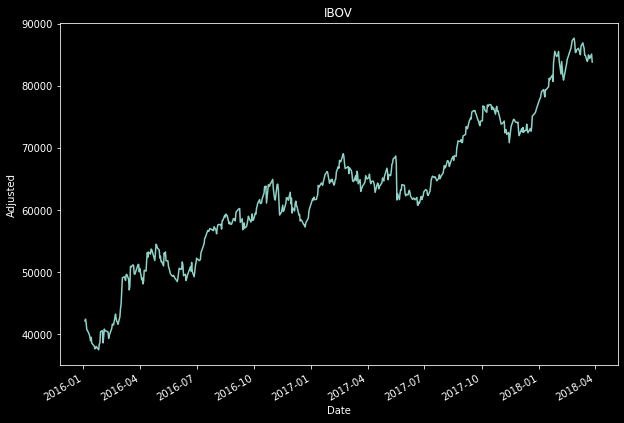

In [109]:
#this part will be covered in the next seccion, but let's see some examples:
#Plot Ibov
quandl_groupped.dropna(subset=["Ibov"], axis=0, inplace = True) #axis=0 drop row; axis=1 drop collumn
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
quandl_groupped['Ibov'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("IBOV")
plt.style.use('dark_background')
plt.show()

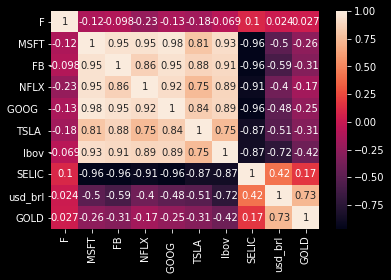

In [110]:
import seaborn as sns
sns.heatmap(quandl_groupped.corr(), annot = True)